# CS-E4650 Methods of Data mining

## Appendix: Examples how to use networkx

Use the following code snippet to read the social network $G$. The code also loads (and, if needed, installs) the required Python packages and finally prints the nodes and edges of $G$.

In [1]:
# possibly install and import required packages 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle 
import random 
import random

# read social network weighted, directed graph 
file_path = 'G_esc_2018.pkl'
with open(file_path, 'rb') as file:
    G = pickle.load(file) 

# print nodes and edges with their weight 
print("Nodes in G: ", G.nodes, "\n\n", "Edges in G: ", G.edges(data=True))

Nodes in G:  ['Albania', 'Israel', 'Cyprus', 'Austria', 'Germany', 'Italy', 'Czech Republic', 'Sweden', 'Estonia', 'Denmark', 'Moldova', 'Lithuania', 'France', 'Bulgaria', 'Norway', 'Ireland', 'Ukraine', 'Netherlands', 'Serbia', 'Australia', 'Hungary', 'Slovenia', 'Spain', 'United Kingdom', 'Finland', 'Portugal', 'Belarus', 'Belgium', 'Croatia', 'Macedonia', 'Greece', 'Iceland', 'Latvia', 'Malta', 'Poland', 'Romania', 'Russia', 'Switzerland', 'Armenia', 'Georgia', 'Montenegro', 'Azerbaijan', 'San Marino'] 

 Edges in G:  [('Albania', 'Israel', {'points': 6}), ('Albania', 'Cyprus', {'points': 20}), ('Albania', 'Austria', {'points': 2}), ('Albania', 'Germany', {'points': 14}), ('Albania', 'Italy', {'points': 24}), ('Albania', 'Czech Republic', {'points': 1}), ('Albania', 'Sweden', {'points': 4}), ('Albania', 'Estonia', {'points': 4}), ('Albania', 'Denmark', {'points': 0}), ('Albania', 'Moldova', {'points': 2}), ('Albania', 'Albania', {'points': 0}), ('Albania', 'Lithuania', {'points': 0}

Use the following code to visualize the social network graph $G$. Note that countries are represented by their flags and the layout of $G$ follows the geographical location of the countries. Later, you will need to edit the draw_eurovision map function for different useful visualizations.

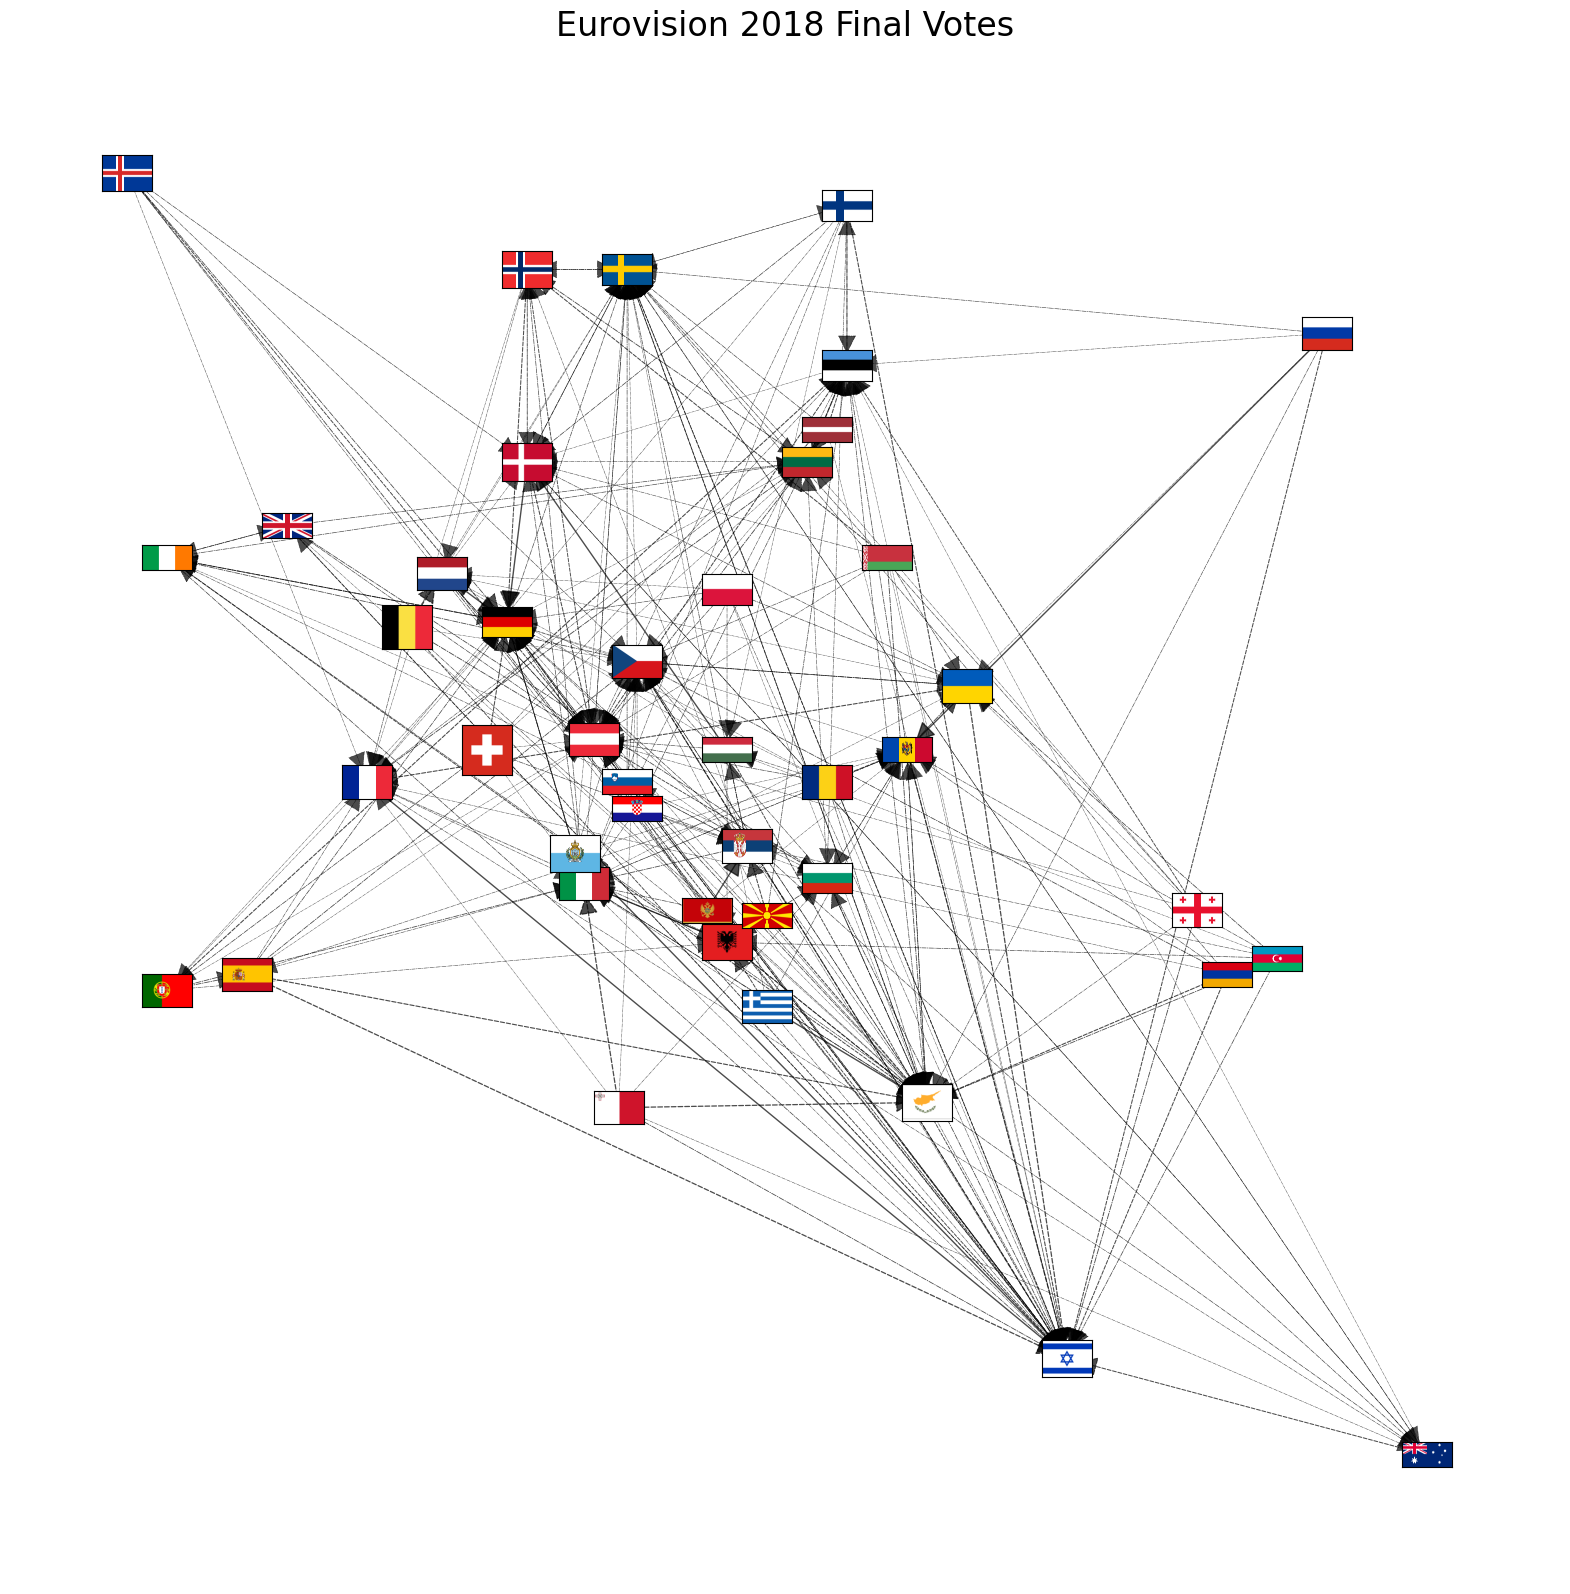

In [2]:
# read location for layout of network 
with open('pos_geo.pkl', 'rb') as f1:
    pos_geo = pickle.load(f1)

# read flags for node representation
with open('flags.pkl', 'rb') as f2:
    flags = pickle.load(f2)

# read flag colors for node representation
with open('flag_color.pkl', 'rb') as f3:
    flag_color = pickle.load(f3)

def draw_eurovision_map(G, pos_geo, flags):
    ''' this function draws the network taking into account 
    location of countries ''' 

    def RGB(red,green,blue): 
        return '#%02x%02x%02x' % (red,green,blue)
    
    # set figure size and remove axis
    plt.figure(figsize=(20, 20))
    ax = plt.gca()
    fig = plt.gcf()
    plt.axis('off')
    plt.title('Eurovision 2018 Final Votes', fontsize=24)

    # transformation for coordinates
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform

    # parameters for ticks
    tick_params = {'top': False, 'bottom': False, 'left': False, 'right': False,
                   'labelleft': False, 'labelbottom': False}

    # line styles for the edges
    styles = ['dotted', 'dashdot', 'dashed', 'solid']

    # draw edges based on voting points
    for e in G.edges(data=True):
        width = e[2]['points'] / 24  
        style = styles[int(width * 3)]
        if width > 0.3:  
            nx.draw_networkx_edges(G, pos_geo, edgelist=[e], width=width, style=style,
                edge_color='black',  
                alpha=0.7,           
                arrows=True,          
                arrowsize=30,         
                arrowstyle='-|>')

    # draw nodes with country flags
    for node in G.nodes():
        imsize = 0.025  
        flag = mpl.image.imread(flags[node])
        
        # node position transformation
        (x, y) = pos_geo[node]
        xx, yy = trans((x, y))  
        xa, ya = trans2((xx, yy))  
        
        # create an axes for each flag and plot the image
        country = plt.axes([xa - imsize / 2.0, ya - imsize / 2.0, imsize, imsize])
        country.imshow(flag)
        country.set_aspect('equal')
        
        # remove tick labels and set tick length to zero
        country.tick_params(labelleft=False, labelbottom=False, length=0)


draw_eurovision_map(G, pos_geo, flags)

Use the following code to compute and plot the weight matrix (or weighted adjacency matrix) $W$ associated with $G$.

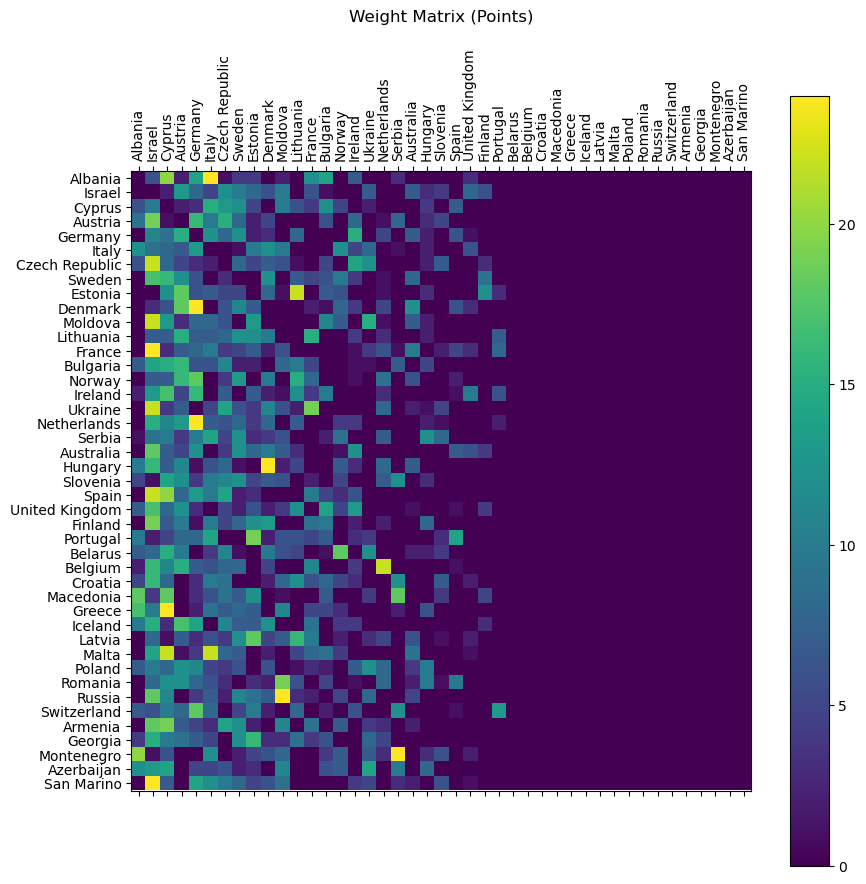

In [3]:
def plot_weight_matrix(G):
    ''' this function plots the weight matrix of the graph G''' 
    # get the list of nodes (for row/column labels)
    nodes = list(G.nodes())
    
    # greate an empty weight matrix
    num_nodes = len(nodes)
    weight_matrix = np.zeros((num_nodes, num_nodes))
    
    # populate the weight matrix with the 'points' weights
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if G.has_edge(u, v):
                weight_matrix[i, j] = G[u][v].get('points', 0)  # Use 0 if no 'points' attribute

    # plot the weight matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(weight_matrix, cmap='viridis')

    # add colorbar
    fig.colorbar(cax)

    # set the labels for x and y axes as node names
    ax.set_xticks(np.arange(num_nodes))
    ax.set_yticks(np.arange(num_nodes))
    ax.set_xticklabels(nodes, rotation=90)
    ax.set_yticklabels(nodes)
    # add title
    plt.title('Weight Matrix (Points)', pad=20)
    plt.show()

    return weight_matrix 

# compute weight matrix and plot 
weight_matrix = plot_weight_matrix(G)

In [8]:
print(nx.average_clustering(G,  weight='points'))

0.057410653311949965


In [9]:
def random_graph(G):
    nodes = list(G.nodes())
    weights = [data.get("points", 1.0) for _, _, data in G.edges(data=True)]
    H = nx.DiGraph()
    H.add_nodes_from(nodes)
    for w in weights:
        u = random.choice(nodes)
        v = random.choice(nodes)
        while u == v:
            v = random.choice(nodes)  
        H.add_edge(u, v, weight=w)
    return H

random_graphs = []
for i in range(100):
    H = random_graph(G)
    random_graphs.append(H)

print("Created", len(random_graphs), "random graphs.")


Created 100 random graphs.


In [10]:
count = 0
original_C = nx.average_clustering(G, weight='points')

for graph in random_graphs:
    if nx.average_clustering(graph, weight='points') > original_C:
        count += 1

print(count)

100


Barely any communities

B)